# 연습 문제 2번


In [ ]:
import numpy as np
X = np.array(range(0,11))
y = np.array((X-3)**2 - 5)

In [ ]:
x = 10
learning_rate = [0.00001, 0.0001, 0.001,0.01, 0.1, 0.3, 0.5, 0.7, 0.9]
precision = 0.00001  
max_iterations = 4

loss_func = lambda x: (x-3)**2 - 5


gradient = lambda x: 2*x-6
loss_list = []
X_list = []
for j in learning_rate :
  for i in range(max_iterations):
      x = x - j * gradient(x)
      print("손실함수값(", x, ")=", loss_func(x))
      X_list.append(x)
      loss_list.append(loss_func(x))
print("최소값 = ", x)

손실함수값( 9.99986 )= 43.9980400196
손실함수값( 9.9997200028 )= 43.99608011759843
손실함수값( 9.999580008399944 )= 43.994120293992154
손실함수값( 9.999440016799776 )= 43.992160548778045
손실함수값( 9.998040128796415 )= 43.972565644244945
손실함수값( 9.996640520770656 )= 43.952978576889876
손실함수값( 9.995241192666501 )= 43.93339934357826
손실함수값( 9.993842144427969 )= 43.91382794117681
손실함수값( 9.979854460139114 )= 43.71836828472388
손실함수값( 9.965894751218835 )= 43.523689685058116
손실함수값( 9.951962961716397 )= 43.32978902107662
손실함수값( 9.938059035792964 )= 43.1366631841484
손실함수값( 9.799297855077105 )= 41.230451322056126
손실함수값( 9.663311897975563 )= 39.39972544970269
손실함수값( 9.530045660016052 )= 37.64149632189447
손실함수값( 9.39944474681573 )= 35.95289306754744
손실함수값( 8.119555797452584 )= 21.209851563230362
손실함수값( 7.095644637962067 )= 11.774305000467432
손실함수값( 6.276515710369654 )= 5.7355552002991566
손실함수값( 5.621212568295723 )= 1.8707553281914615
손실함수값( 4.048485027318289 )= -3.900679147489366
손실함수값( 3.4193940109273155 )= -4.824108663598

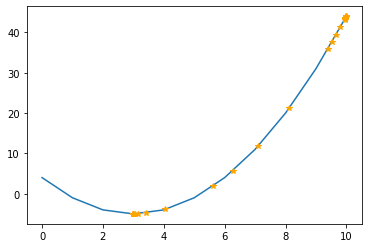

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X,y)
plt.plot(X_list,loss_list,'*', color='orange') 

# 연습 문제 6번


In [ ]:
#ReLU 함수
def relu(x):
	return np.maximum(0, x) 
 
 #ReLU 함수의 미분
def relu_deriv(x):
  if(x.any()>0):
    return 1
  else:
    return 0


inputs,hiddens,outputs=2,2,1
learning_rate=0.2

X=np.array([[0,0],[0,1],[1,0],[1,1]])
T=np.array([[0],[1],[1],[0]])

W1=np.array([[0.1,0.2],[0.3,0.4]])
W2=np.array([[0.3],[0.5]])
B1=np.array([0.1,0.2])
B2=np.array([0.3])


def predict(x):
    layer0 =x
    Z1=np.dot(layer0,W1)+B1
    layer1 = relu(Z1)
    Z2 = np.dot(layer1,W2)+B2
    layer2 = relu(Z2)
    return layer0,layer1,layer2

def fit():
    global W1,W2,B1,B2
    for i in range(9000):
        for x,y in zip(X,T):
            x = np.reshape(x,(1,-1))
            y= np.reshape(y,(1,-1))
            
            layer0,layer1,layer2 = predict(x)
            layer2_error = layer2 - y
            layer2_delta = layer2_error * relu_deriv(layer2)
            layer1_error = np.dot(layer2_delta,W2.T)
            layer1_delta = layer1_error * relu_deriv(layer1)
            
            W2 += -learning_rate * np.dot(layer1.T,layer2_delta)
            W1 += -learning_rate * np.dot(layer0.T,layer1_delta)
            B2 += -learning_rate * np.sum(layer2_delta,axis=0)
            B1 += -learning_rate *np.sum(layer1_delta,axis=0)
            #print('W1 :',W1)
            #print('W2 :',W2)
            #print('B1 :',B1)
            #print('B2 :',B2)
            #print('----------------------------------')
            
def test():
    for x,y in zip(X,T):
        x = np.reshape(x,(1,-1))
        layer0,layer1,layer2 = predict(x)
        print(x,y,layer2)
        
fit()
test()

[[0 0]] [0] [[0.32786885]]
[[0 1]] [1] [[1.06557377]]
[[1 0]] [1] [[0.32786885]]
[[1 1]] [0] [[0.32786885]]


# 연습문제 7번

In [ ]:
#tanh 함수
def tanh(x):
	return np.tanh(x)

#tanh 함수의 미분
def tanh_deriv(x):
	return (1-np.tanh(x))*(1+np.tanh(x))


inputs,hiddens,outputs=2,2,1
learning_rate=0.2

X=np.array([[0,0],[0,1],[1,0],[1,1]])
T=np.array([[0],[1],[1],[0]])

W1=np.array([[0.1,0.2],[0.3,0.4]])
W2=np.array([[0.3],[0.5]])
B1=np.array([0.1,0.2])
B2=np.array([0.3])


def predict(x):
    layer0 =x
    Z1=np.dot(layer0,W1)+B1
    layer1 = tanh(Z1)
    Z2 = np.dot(layer1,W2)+B2
    layer2 = tanh(Z2)
    return layer0,layer1,layer2

def fit():
    global W1,W2,B1,B2
    for i in range(9000):
        for x,y in zip(X,T):
            x = np.reshape(x,(1,-1))
            y= np.reshape(y,(1,-1))
            
            layer0,layer1,layer2 = predict(x)
            layer2_error = layer2 - y
            layer2_delta = layer2_error * tanh_deriv(layer2)
            layer1_error = np.dot(layer2_delta,W2.T)
            layer1_delta = layer1_error * tanh_deriv(layer1)
            
            W2 += -learning_rate * np.dot(layer1.T,layer2_delta)
            W1 += -learning_rate * np.dot(layer0.T,layer1_delta)
            B2 += -learning_rate * np.sum(layer2_delta,axis=0)
            B1 += -learning_rate *np.sum(layer1_delta,axis=0)
            #print('W1 :',W1)
            #print('W2 :',W2)
            #print('B1 :',B1)
            #print('B2 :',B2)
            #print('----------------------------------')
            
def test():
    for x,y in zip(X,T):
        x = np.reshape(x,(1,-1))
        layer0,layer1,layer2 = predict(x)
        print(x,y,layer2)
        
fit()
test()

[[0 0]] [0] [[-0.0138268]]
[[0 1]] [1] [[0.99959976]]
[[1 0]] [1] [[0.99959961]]
[[1 1]] [0] [[-0.02122921]]


# 연습문제 8번

In [ ]:
import numpy as np
def actf(x):
    return 1/(1+np.exp(-1))

def actf_deriv(x):
    return x*(1-x)


inputs,hiddens,outputs=2,2,1
learning_rate=0.2

X=np.array([[0,0],[0,1],[1,0],[1,1]])
T=np.array([[0],[1],[1],[0]])

W1=np.array([[0.1,0.2],[0.3,0.4]])
W2=np.array([[0.3],[0.5]])
B1=np.array([0.1,0.2])
B2=np.array([0.3])


def predict(x):
    layer0 =x
    Z1=np.dot(layer0,W1)+B1
    layer1 = actf(Z1)
    Z2 = np.dot(layer1,W2)+B2
    layer2 = actf(Z2)
    return layer0,layer1,layer2

def fit():
    global W1,W2,B1,B2
    for i in range(9000):
        for x,y in zip(X,T):
            x = np.reshape(x,(1,-1))
            y= np.reshape(y,(1,-1))
            
            layer0,layer1,layer2 = predict(x)
            layer2_error = layer2 - y
            layer2_delta = layer2_error * actf_deriv(layer2)
            layer1_error = np.dot(layer2_delta,W2.T)
            layer1_delta = layer1_error * actf_deriv(layer1)
            
            W2 += -learning_rate * np.dot(layer1.T,layer2_delta)
            W1 += -learning_rate * np.dot(layer0.T,layer1_delta)
            B2 += -learning_rate * np.sum(layer2_delta,axis=0)
            B1 += -learning_rate *np.sum(layer1_delta,axis=0)
            print('W1 :',W1)
            print('W2 :',W2)
            print('B1 :',B1)
            print('B2 :',B2)
            print('----------------------------------')
            
def test():
    for x,y in zip(X,T):
        x = np.reshape(x,(1,-1))
        layer0,layer1,layer2 = predict(x)
        print(x,y,layer2)
        
fit()
test()

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
W2 : [[-234.0701231]
 [-233.8701231]]
B1 : [7366.39016064 7353.88379383]
B2 : [-320.29007302]
----------------------------------
W1 : [[3684.11591698 3677.91216838]
 [3684.17410131 3677.97035271]]
W2 : [[-234.09113882]
 [-233.89113882]]
B1 : [7367.71312426 7355.20562706]
B2 : [-320.31881999]
----------------------------------
W1 : [[3684.11591698 3677.91216838]
 [3684.17410131 3677.97035271]]
W2 : [[-234.11215454]
 [-233.91215454]]
B1 : [7369.03620667 7356.52757906]
B2 : [-320.34756696]
----------------------------------
W1 : [[3684.11591698 3677.91216838]
 [3683.6873228  3677.48399004]]
W2 : [[-234.10442329]
 [-233.90442329]]
B1 : [7368.54942816 7356.0412164 ]
B2 : [-320.33699154]
----------------------------------
W1 : [[3683.62915455 3677.42582179]
 [3683.6873228  3677.48399004]]
W2 : [[-234.09669204]
 [-233.89669204]]
B1 : [7368.06266572 7355.55486981]
B2 : [-320.32641612]
----------------------------------
W1 : [[3684.95226834 3678.74780519]
 [3

# 연습문제 9번

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier

iris=load_iris()
X=iris.data[:,(0,1)]
y=(iris.target==0).astype(np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


In [ ]:
mlp = MLPClassifier(random_state = 32)

mlp.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(random_state=32)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


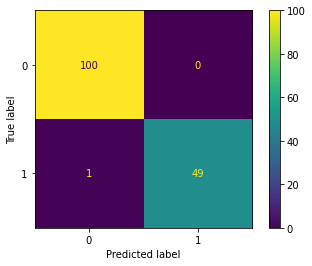

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mlp, X, y);
